In [7]:
import numpy as np
import pylab as  plt
import os
import requests

In [8]:
# 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
# https://github.com/CSSEGISandData/COVID-19
# start datum 1/22/2020

In [9]:
def load_covid_data(cases, deaths):
    d1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    d2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
    r = requests.get(d1)
    if r.status_code == 200:
        print(r.status_code)
        with open(cases, 'w') as out:
            out.write(r.text)
    else:
        print(r.status_code)
    r = requests.get(d2)
    if r.status_code == 200:
        with open(deaths, 'w') as out:
            out.write(r.text)
    else:
        print(r.status_code)

cases_file = "time_series_covid19_confirmed_global.csv"
deaths_file = "time_series_covid19_deaths_global.csv"
load_covid_data(cases_file, deaths_file)

200


In [10]:

def get_data(fname, country):
    with open(fname, 'r') as ein:
        lines = ein.read().splitlines()
    for line in lines[1:]:
        l = line.split(",")
        if l[1].strip() == country:
            data = [int(x) for x in l[4:]]
            return np.array(data)

cases  = get_data(cases_file, "Germany")
deaths = get_data(deaths_file, "Germany")

cases  = cases[1:] - cases[:-1] 
deaths = deaths[1:] - deaths[:-1]

n0 = (31-22) + 29
n = len(cases) - n0 
data = np.zeros((n, 2))
data[:,0] = cases[n0:]
data[:,1] = deaths[n0:]
np.save("johns_hopkins.npy", data)

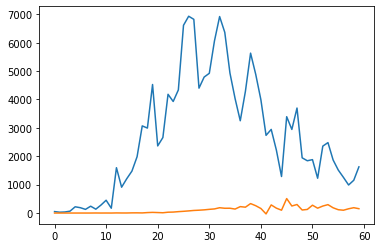

In [12]:
plt.plot(data[:,0])
plt.plot(data[:,1])